<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw8_Latent_Semantic_and_Dirichlet_Allocation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

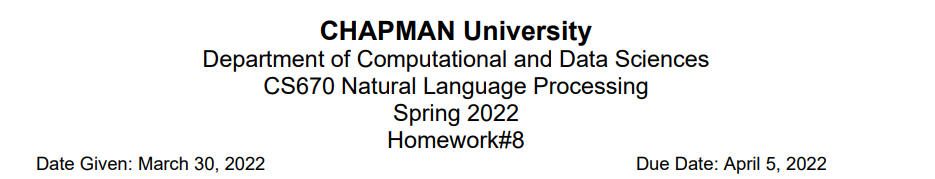

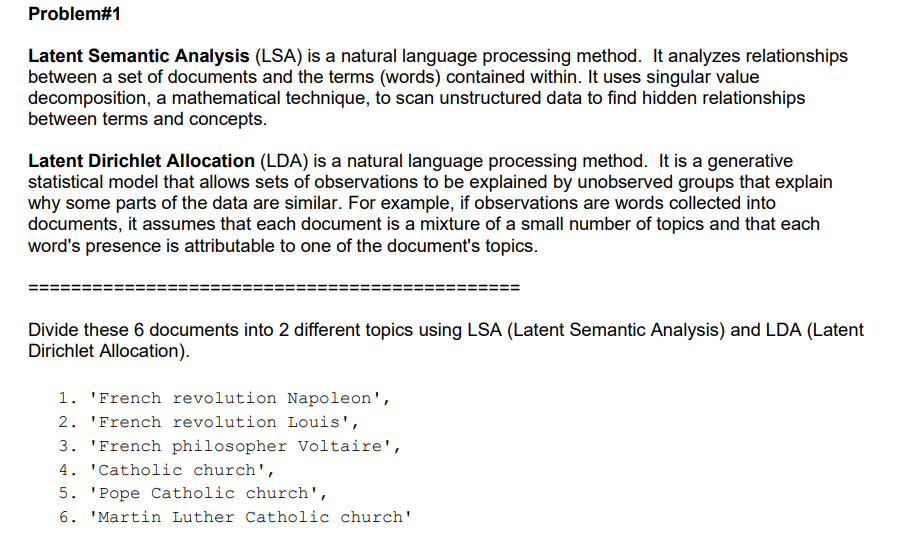

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import eig
from scipy.linalg import svd
from numpy.linalg import inv
np.set_printoptions(precision=2, suppress=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
corpus = ['French revolution Napoleon',
'French revolution Louis',
'French philosopher Voltaire',
'Catholic church',
'Pope Catholic church',
'Martin Luther Catholic church'
          ]

In [ ]:
vectorizer = CountVectorizer()
bag_of_words= vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['catholic', 'church', 'french', 'louis', 'luther', 'martin',
       'napoleon', 'philosopher', 'pope', 'revolution', 'voltaire'],
      dtype=object)

In [ ]:
df1= pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
df1

,catholic,church,french,louis,luther,martin,napoleon,philosopher,pope,revolution,voltaire
0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0
5,1,1,0,0,1,1,0,0,0,0,0


In [ ]:
df1.T

,0,1,2,3,4,5
catholic,0,0,0,1,1,1
church,0,0,0,1,1,1
french,1,1,1,0,0,0
louis,0,1,0,0,0,0
luther,0,0,0,0,0,1
martin,0,0,0,0,0,1
napoleon,1,0,0,0,0,0
philosopher,0,0,1,0,0,0
pope,0,0,0,0,1,0
revolution,1,1,0,0,0,0


### LSA: DTM and TDM documents

In [ ]:
TDM= bag_of_words.todense().T
DTM= bag_of_words.todense()
print('TDM:\n',TDM)

TDM:
 [[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [1 1 0 0 0 0]
 [0 0 1 0 0 0]]


In [ ]:
print('DTM:\n',DTM)

DTM:
 [[0 0 1 0 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 1 1 0 0 0 0 0]]


In [ ]:
sigma_significant_num=2
svd=TruncatedSVD(n_components=sigma_significant_num)
lsa_word=svd.fit_transform(bag_of_words.todense().T)
print(lsa_word)

[[ 1.72 -0.  ]
 [ 1.72 -0.  ]
 [ 0.    1.72]
 [ 0.    0.63]
 [ 0.67 -0.  ]
 [ 0.67 -0.  ]
 [ 0.    0.63]
 [ 0.    0.46]
 [ 0.56 -0.  ]
 [ 0.    1.26]
 [ 0.    0.46]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
lsa_doc=svd.fit_transform(bag_of_words.todense())
print(lsa_doc)

[[-0.    1.5 ]
 [ 0.    1.5 ]
 [-0.    1.1 ]
 [ 1.29  0.  ]
 [ 1.5   0.  ]
 [ 1.79  0.  ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### LSA maping topics 

In [ ]:
topic_encoded_df=pd.DataFrame(lsa_doc, columns=["Topic1","Topic2"])
topic_encoded_df['Document']=corpus
topic_encoded_df['Topic']=np.where(topic_encoded_df['Document'].str.contains('Catholic'), 'Catholic Church', 'French History')
print(topic_encoded_df.round(4) )

   Topic1  Topic2                       Document            Topic
0 -0.0000  1.5035     French revolution Napoleon   French History
1  0.0000  1.5035        French revolution Louis   French History
2 -0.0000  1.1006    French philosopher Voltaire   French History
3  1.2874  0.0000                Catholic church  Catholic Church
4  1.4981  0.0000           Pope Catholic church  Catholic Church
5  1.7912  0.0000  Martin Luther Catholic church  Catholic Church


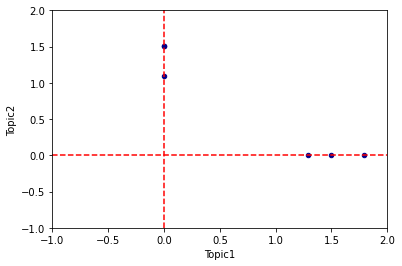

In [ ]:
ax1 = topic_encoded_df.plot.scatter(x='Topic1', y='Topic2', c='DarkBlue')
ax1.set_xlim(-1,2)
ax1.set_ylim(-1,2)
ax1.axhline(0, color="red", linestyle="--")
ax1.axvline(0, color="red", linestyle="--")

## Latent Dirichlet Allocation

In [ ]:
from gensim import matutils, models
import scipy.sparse
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_nltk= stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Create DTM and TDM 

In [ ]:
data_clean=pd.DataFrame(corpus,columns=['docs'])
cv=CountVectorizer(stop_words=stop_words_nltk)
data_cv=cv.fit_transform(data_clean.docs)
dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dtm.index=data_clean.index
print(dtm)

   catholic  church  french  louis  luther  martin  napoleon  philosopher  \
0         0       0       1      0       0       0         1            0   
1         0       0       1      1       0       0         0            0   
2         0       0       1      0       0       0         0            1   
3         1       1       0      0       0       0         0            0   
4         1       1       0      0       0       0         0            0   
5         1       1       0      0       1       1         0            0   

   pope  revolution  voltaire  
0     0           1         0  
1     0           1         0  
2     0           0         1  
3     0           0         0  
4     1           0         0  
5     0           0         0  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### TDM

In [ ]:
tdm=dtm.T
print(tdm)

             0  1  2  3  4  5
catholic     0  0  0  1  1  1
church       0  0  0  1  1  1
french       1  1  1  0  0  0
louis        0  1  0  0  0  0
luther       0  0  0  0  0  1
martin       0  0  0  0  0  1
napoleon     1  0  0  0  0  0
philosopher  0  0  1  0  0  0
pope         0  0  0  0  1  0
revolution   1  1  0  0  0  0
voltaire     0  0  1  0  0  0


In [ ]:
# Create Sparse Matrix
sparse_counts= scipy.sparse.csr_matrix(tdm)
print(sparse_counts)
corpus_new=matutils.Sparse2Corpus(sparse_counts)

  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (3, 1)	1
  (4, 5)	1
  (5, 5)	1
  (6, 0)	1
  (7, 2)	1
  (8, 4)	1
  (9, 0)	1
  (9, 1)	1
  (10, 2)	1


In [ ]:
id2word=dict((v,k) for k, v in cv.vocabulary_.items())
print(id2word)

{2: 'french', 9: 'revolution', 6: 'napoleon', 3: 'louis', 7: 'philosopher', 10: 'voltaire', 0: 'catholic', 1: 'church', 8: 'pope', 5: 'martin', 4: 'luther'}


## LDA Model with two topics and 500 passes

In [ ]:
lda=models.LdaModel(corpus=corpus_new,id2word=id2word,num_topics=2,passes=500)
lda.print_topics()

[(0,
  '0.241*"catholic" + 0.241*"church" + 0.103*"luther" + 0.103*"martin" + 0.103*"pope" + 0.035*"french" + 0.035*"revolution" + 0.035*"voltaire" + 0.035*"philosopher" + 0.035*"louis"'),
 (1,
  '0.241*"french" + 0.172*"revolution" + 0.103*"napoleon" + 0.103*"louis" + 0.103*"voltaire" + 0.103*"philosopher" + 0.035*"catholic" + 0.035*"church" + 0.035*"pope" + 0.035*"luther"')]

LDA appears to show two topics with higher weightage assigned to Catholic Church  in first topic and higher weight assigned to french history in second topic.